In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import numpy as np
#from scipy.optimize import curve_fit
from scipy.stats import t
from matplotlib.ticker import MultipleLocator
#from scipy.stats import t as t_dist

# Functions

In [2]:
def plot_E_kev(E, spectrum, time):
    plt.figure(figsize=(12, 5))
    # === IMPOSTA TICKS X PRIMA DEL PLOT ===
    dx = 100000
    dy = 100
    ax = plt.gca()
    #ax.xaxis.set_major_locator(MultipleLocator(dx))   # Tacche principali con etichetta
    #ax.xaxis.set_minor_locator(MultipleLocator(dy))   # Tacche secondarie senza etichetta
    ax.tick_params(axis='x', which='major', length=7, labelsize=10)  # numeri grandi
    ax.tick_params(axis='x', which='minor', length=4, labelsize=0)   # tacche piccole, no numero

    spectrum_norm = spectrum/time
    #= np.arange(len(spectrum))  # canali da 0 a N-1
    plt.plot(E,spectrum_norm , lw=0.5, label='Spectrum')
    db = E[1]-E_kev[0]
    plt.xlabel('Energy (keV)', size = 15)
    plt.ylabel(r'Counts / {db:.1f} s$\cdot$keV', size = 15)
    plt.ylim(1,max(spectrum_norm))

    plt.legend()
    plt.grid(alpha = 0.25)
 

color='tab:blue'
color='tab:orange'

# Data

In [3]:
file_path = "csv-files/zro2_white&green_ 50_days.csv"
data = pd.read_csv(file_path, header=None)
spectrum_50 = data[0].values
t_50 = 4279386 # 50 days exposure
a_50 = 0.357304
b_50 = -0.295444
E_kev = np.arange(len(spectrum_50))  * a_50 + b_50
mask = (E_kev>=0) & (E_kev <= 3000)
E_kev = E_kev[mask]
spectrum_50 = spectrum_50[mask]
spectrum_50_norm = spectrum_50/t_50

In [4]:
file_path = "csv-files/zro2_white&green_30_days.csv"
data = pd.read_csv(file_path, header=None)
spectrum_30 = data[0].values
t_30 = 3183615 # 30 days exposure
spectrum_30 = spectrum_30[mask]
spectrum_30_norm = spectrum_30 / t_30

In [5]:
file_path = "csv-files/bkg.csv"
data = pd.read_csv(file_path, header=None)
spectrum_bkg = data[0].values
t_bkg = 4143234 # 40 days exposure
spectrum_bkg = spectrum_bkg[mask]
spectrum_bkg_norm = spectrum_bkg  / t_bkg

# Sample + Background rates Plot

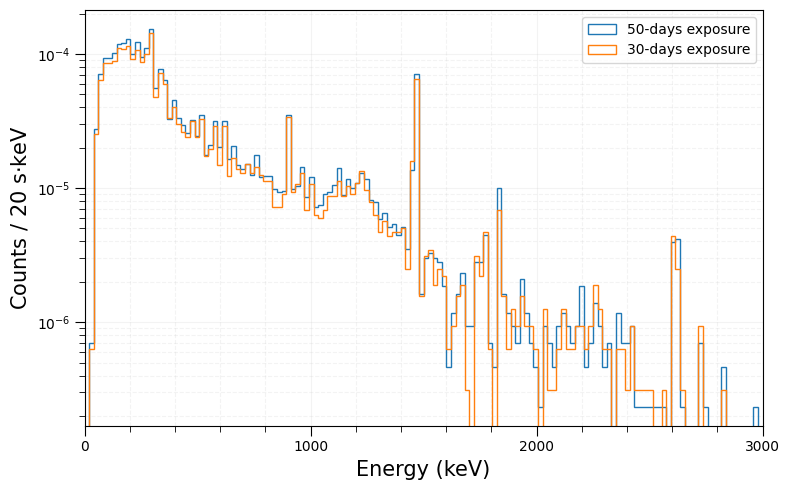

In [6]:
plt.figure(figsize=(8, 5))
ax = plt.gca()


dx_major = 1000
dx_minor = 200

ax.xaxis.set_major_locator(MultipleLocator(dx_major))
ax.xaxis.set_minor_locator(MultipleLocator(dx_minor))
dy_major = 100
dy_minor = 20

ax.yaxis.set_major_locator(MultipleLocator(dy_major))
ax.yaxis.set_minor_locator(MultipleLocator(dy_minor))

ax.tick_params(axis='x', which='major', length=7, labelsize=10)
ax.tick_params(axis='x', which='minor', length=4)

ax.tick_params(axis='y', which='major', length=7, labelsize=10)
ax.tick_params(axis='y', which='minor', length=4)

# Bin width

bins = np.linspace(min(E_kev), max(E_kev), int(len(E_kev)/56))
counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_50_norm,   histtype='step',label='50-days exposure')
db = bin_edge[1]- bin_edge[0]

counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_30_norm,   histtype='step',label='30-days exposure')
db = bin_edge[1]- bin_edge[0]

plt.xlabel('Energy (keV)', size = 15)
plt.ylabel(rf'Counts / {db:.0f} s$\cdot$keV', size = 15)
plt.xlim(0, 3000)
plt.yscale('log')
plt.grid(alpha=0.15)
ax.grid(which='major', linestyle='-', alpha=0.15)
ax.grid(which='minor', linestyle='--', alpha=0.15)
plt.tight_layout()
plt.legend()
plt.show()

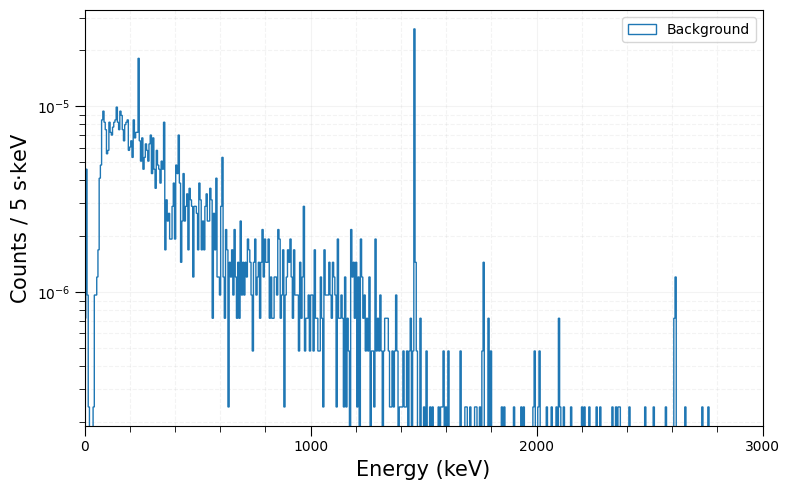

In [7]:
# backgorund spectrum
plt.figure(figsize=(8, 5))
ax = plt.gca()


dx_major = 1000
dx_minor = 200

ax.xaxis.set_major_locator(MultipleLocator(dx_major))
ax.xaxis.set_minor_locator(MultipleLocator(dx_minor))
dy_major = 100
dy_minor = 20

ax.yaxis.set_major_locator(MultipleLocator(dy_major))
ax.yaxis.set_minor_locator(MultipleLocator(dy_minor))

ax.tick_params(axis='x', which='major', length=7, labelsize=10)
ax.tick_params(axis='x', which='minor', length=4)

ax.tick_params(axis='y', which='major', length=7, labelsize=10)
ax.tick_params(axis='y', which='minor', length=4)

# Bin width

#bins = np.linspace(min(E_kev), max(E_kev), int(len(E_kev)/56))
bins = np.linspace(min(E_kev), max(E_kev), int(len(E_kev)/15))
counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_bkg_norm,   histtype='step',label='Background')
db = bin_edge[1]- bin_edge[0]



plt.xlabel('Energy (keV)', size = 15)
plt.ylabel(rf'Counts / {db:.0f} s$\cdot$keV', size = 15)
plt.xlim(0, 3000)
plt.yscale('log')
plt.grid(alpha=0.15)
ax.grid(which='major', linestyle='-', alpha=0.15)
ax.grid(which='minor', linestyle='--', alpha=0.15)
plt.tight_layout()
plt.legend()
plt.show()

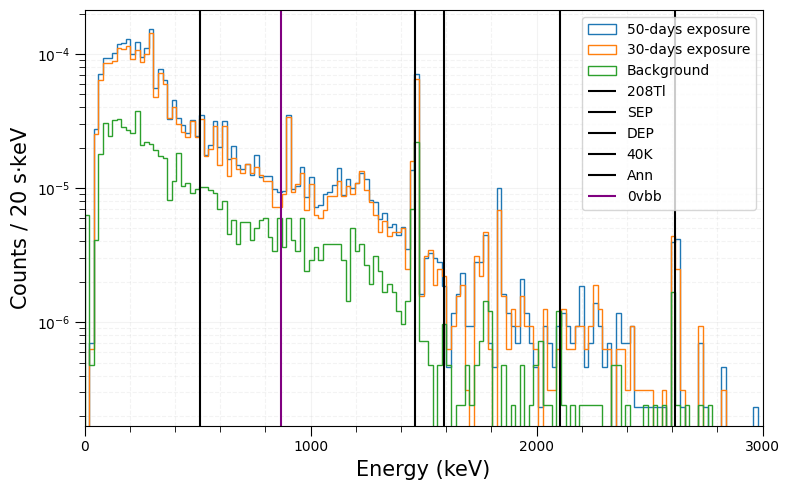

In [27]:
# background + samples spectra

plt.figure(figsize=(8, 5))
ax = plt.gca()


dx_major = 1000
dx_minor = 200

ax.xaxis.set_major_locator(MultipleLocator(dx_major))
ax.xaxis.set_minor_locator(MultipleLocator(dx_minor))
dy_major = 100
dy_minor = 20

ax.yaxis.set_major_locator(MultipleLocator(dy_major))
ax.yaxis.set_minor_locator(MultipleLocator(dy_minor))

ax.tick_params(axis='x', which='major', length=7, labelsize=10)
ax.tick_params(axis='x', which='minor', length=4)

ax.tick_params(axis='y', which='major', length=7, labelsize=10)
ax.tick_params(axis='y', which='minor', length=4)

# Bin width

bins = np.linspace(min(E_kev), max(E_kev), int(len(E_kev)/56))
#bins = np.linspace(min(E_kev), max(E_kev), int(len(E_kev)/15))
counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_50_norm,   histtype='step',label='50-days exposure')
db = bin_edge[1]- bin_edge[0]

counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_30_norm,   histtype='step',label='30-days exposure')
db = bin_edge[1]- bin_edge[0]

counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_bkg_norm,   histtype='step',label='Background')
db = bin_edge[1]- bin_edge[0]

plt.xlabel('Energy (keV)', size = 15)
plt.ylabel(rf'Counts / {db:.0f} s$\cdot$keV', size = 15)
plt.xlim(0, 3000)
plt.yscale('log')
plt.grid(alpha=0.15)
ax.grid(which='major', linestyle='-', alpha=0.15)
ax.grid(which='minor', linestyle='--', alpha=0.15)

plt.vlines(2614, 1e-7, 1e-3, colors= "black", label="208Tl")
plt.vlines(2614-511, 1e-7, 1e-3, colors= "black", label="SEP")
plt.vlines(2614-1022, 1e-7, 1e-3, colors= "black", label="DEP")
plt.vlines(1460, 1e-7, 1e-3, color = "black", label= "40K")
plt.vlines(511, 1e-7, 1e-3, color = "black", label= "Ann")
plt.vlines(871, 1e-7, 1e-3, color = "purple", label= "0vbb")

plt.tight_layout()
plt.legend()
plt.show()

# Counting Rate

In [9]:
N_bkg = spectrum_bkg.sum()
N_30  = spectrum_30.sum()
N_50  = spectrum_50.sum()

rate_bkg = N_bkg / t_bkg
rate_30  = N_30  / t_30
rate_50  = N_50  / t_50

err_bkg = np.sqrt(N_bkg) / t_bkg
err_30  = np.sqrt(N_30)  / t_30
err_50  = np.sqrt(N_50)  / t_50

print(f"Background = {rate_bkg:.4f} ± {err_bkg:.5f} counts/s")
print(f"30 days    = {rate_30:.4f} ± {err_30:.5f} counts/s")
print(f"50 days    = {rate_50:.4f} ± {err_50:.5f} counts/s")

Background = 0.0007 ± 0.00001 counts/s
30 days    = 0.0023 ± 0.00003 counts/s
50 days    = 0.0025 ± 0.00002 counts/s


# sample vs bkg spectra comparison

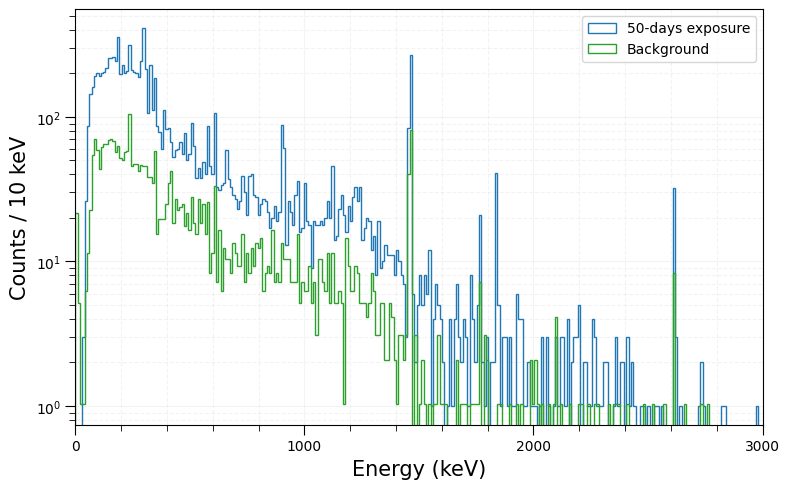

In [10]:
# bkg + 50 days
plt.figure(figsize=(8, 5))
ax = plt.gca()


dx_major = 1000
dx_minor = 200

ax.xaxis.set_major_locator(MultipleLocator(dx_major))
ax.xaxis.set_minor_locator(MultipleLocator(dx_minor))
dy_major = 100
dy_minor = 20

ax.yaxis.set_major_locator(MultipleLocator(dy_major))
ax.yaxis.set_minor_locator(MultipleLocator(dy_minor))

ax.tick_params(axis='x', which='major', length=7, labelsize=10)
ax.tick_params(axis='x', which='minor', length=4)

ax.tick_params(axis='y', which='major', length=7, labelsize=10)
ax.tick_params(axis='y', which='minor', length=4)

# Bin width

#bins = np.linspace(min(E_kev), max(E_kev), int(len(E_kev)/56))
bins = np.linspace(min(E_kev), max(E_kev), int(len(E_kev)/28))
counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_50, color = 'tab:blue',   histtype='step',label='50-days exposure')
#counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_30,   histtype='step',label='30-days exposure')
#db = bin_edge[1]- bin_edge[0]
spectrum_bkg_50 = spectrum_bkg * (t_50 / t_bkg)
counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_bkg_50,  color = 'tab:green',  histtype='step',label='Background')
db = bin_edge[1]- bin_edge[0]

plt.xlabel('Energy (keV)', size = 15)
plt.ylabel(rf'Counts / {db:.0f} keV', size = 15)
plt.xlim(0, 3000)
plt.yscale('log')
plt.grid(alpha=0.15)
ax.grid(which='major', linestyle='-', alpha=0.15)
ax.grid(which='minor', linestyle='--', alpha=0.15)
plt.tight_layout()
plt.legend()
plt.show()

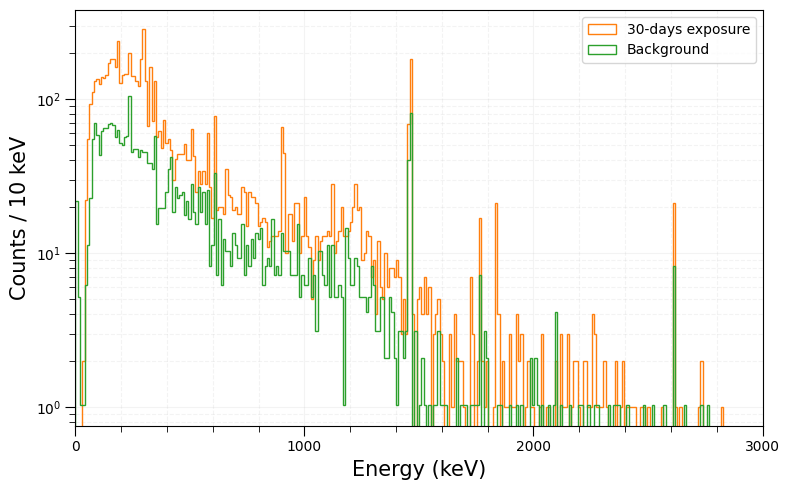

In [11]:
# bkg + 50 days
plt.figure(figsize=(8, 5))
ax = plt.gca()


dx_major = 1000
dx_minor = 200

ax.xaxis.set_major_locator(MultipleLocator(dx_major))
ax.xaxis.set_minor_locator(MultipleLocator(dx_minor))
dy_major = 100
dy_minor = 20

ax.yaxis.set_major_locator(MultipleLocator(dy_major))
ax.yaxis.set_minor_locator(MultipleLocator(dy_minor))

ax.tick_params(axis='x', which='major', length=7, labelsize=10)
ax.tick_params(axis='x', which='minor', length=4)

ax.tick_params(axis='y', which='major', length=7, labelsize=10)
ax.tick_params(axis='y', which='minor', length=4)

# Bin width

#bins = np.linspace(min(E_kev), max(E_kev), int(len(E_kev)/56))
bins = np.linspace(min(E_kev), max(E_kev), int(len(E_kev)/28))
counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_30, color = 'tab:orange',   histtype='step',label='30-days exposure')

spectrum_bkg_50 = spectrum_bkg * (t_50 / t_bkg)
counts, bin_edge, _ = plt.hist(E_kev, bins = bins, weights = spectrum_bkg_50,  color = 'tab:green',  histtype='step',label='Background')
db = bin_edge[1]- bin_edge[0]

plt.xlabel('Energy (keV)', size = 15)
plt.ylabel(rf'Counts / {db:.0f} keV', size = 15)
plt.xlim(0, 3000)
plt.yscale('log')
plt.grid(alpha=0.15)
ax.grid(which='major', linestyle='-', alpha=0.15)
ax.grid(which='minor', linestyle='--', alpha=0.15)
plt.tight_layout()
plt.legend()
plt.show()

# zoomed spectra in the 2 ROI

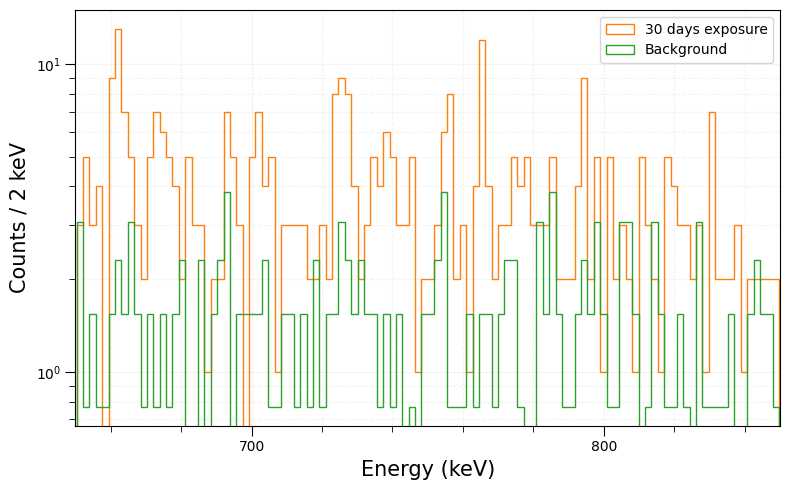

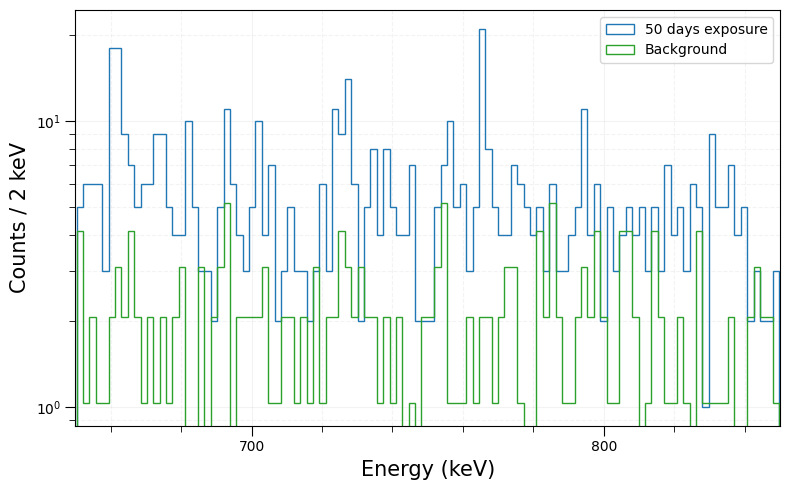

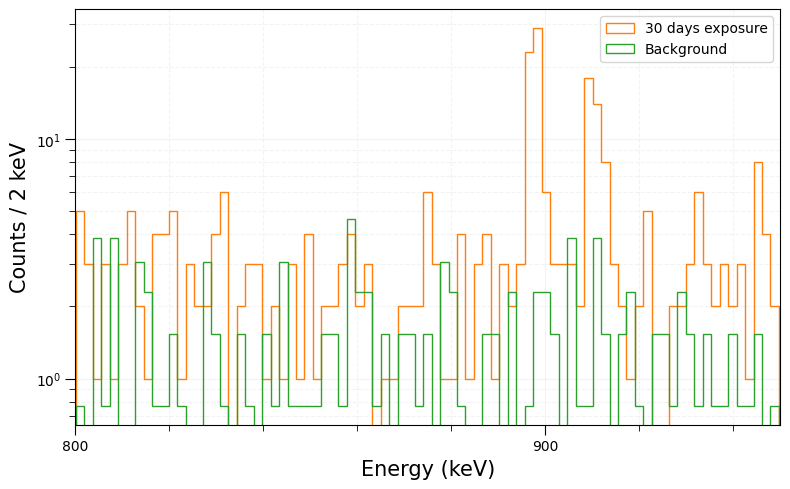

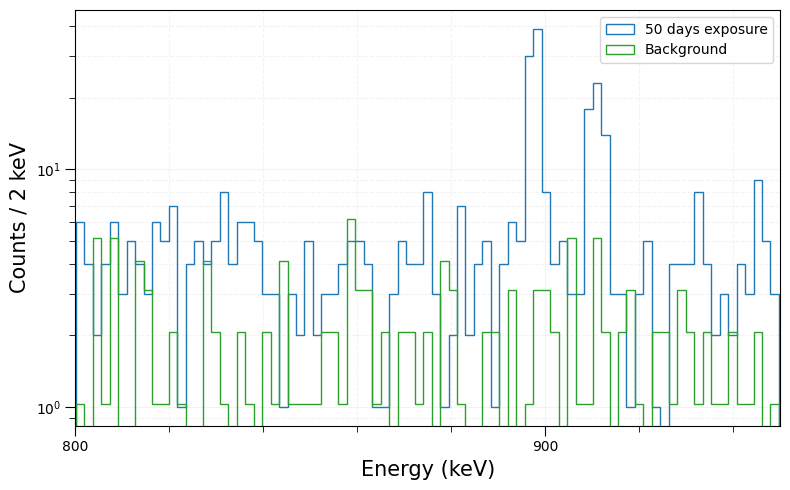

In [30]:
roi_list = [(650, 850), (800, 950)]

# Campioni e background già scalato al tempo del campione
spectra = [
    ('30 days', spectrum_30, spectrum_bkg * (t_30 / t_bkg)),
    ('50 days', spectrum_50, spectrum_bkg * (t_50 / t_bkg))
]

for roi_min, roi_max in roi_list:
    mask = (E_kev >= roi_min) & (E_kev <= roi_max)
    
    for label, sample, bkg_scaled in spectra:
        plt.figure(figsize=(8, 5))
        ax = plt.gca()
        
        # Tick e griglia
        dx_major = 100
        dx_minor = 20
        dy_major = 10
        dy_minor = 2
        ax.xaxis.set_major_locator(MultipleLocator(dx_major))
        ax.xaxis.set_minor_locator(MultipleLocator(dx_minor))
        ax.yaxis.set_major_locator(MultipleLocator(dy_major))
        ax.yaxis.set_minor_locator(MultipleLocator(dy_minor))
        ax.tick_params(axis='x', which='major', length=7, labelsize=10)
        ax.tick_params(axis='x', which='minor', length=4)
        ax.tick_params(axis='y', which='major', length=7, labelsize=10)
        ax.tick_params(axis='y', which='minor', length=4)
        
        # Histogram bins (stesso numero di bin del grafico principale)
        bins = np.linspace(E_kev[mask].min(), E_kev[mask].max(), int(len(E_kev[mask])/5))
        db = bins[1] - bins[0]
        
        # Plotta campione
        plt.hist(E_kev[mask], bins=bins, weights=sample[mask],
                 color='tab:orange' if label=='30 days' else 'tab:blue',
                 histtype='step', label=f'{label} exposure')
        
        # Plotta background scalato
        plt.hist(E_kev[mask], bins=bins, weights=bkg_scaled[mask],
                 color='tab:green', histtype='step', label='Background')
        
        plt.xlabel('Energy (keV)', size=15)
        plt.ylabel(rf'Counts / {db:.0f} keV', size=15)
        plt.xlim(roi_min, roi_max)
        plt.yscale('log')
        ax.grid(which='major', linestyle='-', alpha=0.15)
        ax.grid(which='minor', linestyle='--', alpha=0.15)
        plt.tight_layout()
        plt.legend()
        plt.show()

# Sensitivity estimation

In [28]:
# 96Zr
FWHM = 2 # kev : binanggio precedente
roi_96 = (778 - FWHM, 778 + FWHM)  # ±1.5 bin
mask_96 = (E_kev >= roi_96[0]) & (E_kev <= roi_96[1])

# 94Zr
roi_94 = (871 - FWHM, 871 + FWHM)
mask_94 = (E_kev >= roi_94[0]) & (E_kev <= roi_94[1])


In [32]:
spectrum_bkg_30 = spectrum_bkg * (t_30 / t_bkg)
spectrum_bkg_50 = spectrum_bkg * (t_50 / t_bkg)

In [36]:
# Picchi e ROI
peaks = {
    "96Zr": 778,
    "94Zr": 871
}
roi_halfwidth = FWHM   # ±7.5 keV, come prima

# Spettri campione e background scalati
spectra = {
    "30 days": (spectrum_30, spectrum_bkg * (t_30 / t_bkg)),
    "50 days": (spectrum_50, spectrum_bkg * (t_50 / t_bkg))
}


In [ ]:
m_sample = 551.3        # g ZrO2
Mr_sample = 123.22      # g/mol
i_a_96Zr = 0.028
i_a_94Zr = 0.1738

# Tempo di misura in anni
t_30 = 0.1356           # anni, 30 giorni
t_50 = 0.1356           # anni, 50 giorni

# Efficienza di rivelazione
eff_96Zr = 0.024131
eff_94Zr = 0.022935



N_A = 6.022e23


In [ ]:
efficiencies = {
    "96Zr": eff_96Zr,
    "94Zr": eff_94Zr
}

N_nuclei = {
    "96Zr": (m_sample * i_a_96Zr / Mr_sample) * N_A,
    "94Zr": (m_sample * i_a_94Zr / Mr_sample) * N_A
}

In [47]:


# -------------------------------
# Loop su spettri e picchi
# -------------------------------
for label, (sample, bkg_scaled) in spectra.items():
    print(f"\n--- {label} ---")
    t_meas = t_30 if label=="30 days" else t_50
    
    for iso, peak in peaks.items():
        roi = (peak - roi_halfwidth, peak + roi_halfwidth)
        mask = (E_kev >= roi[0]) & (E_kev <= roi[1])
        
        # Conteggi nel ROI
        N_sample = sample[mask].sum()
        N_bkg    = int(bkg_scaled[mask].sum())
        S_net    = N_sample - N_bkg
        sigma    = np.sqrt(N_sample + N_bkg)
        
        # Limite preliminare T1/2
        T_half = (np.log(2) * N_nuclei[iso] * t_meas * efficiencies[iso]) / sigma
        
        print(f"{iso}: ROI {roi[0]:.1f}-{roi[1]:.1f} keV -> "
              f"N_sample={N_sample:.2f}, N_bkg={N_bkg:.2f}, "
              f"S_net={S_net:.2f}, sigma={sigma:.2f}, "
              f"T1/2 limit = {T_half:.2e} years")



--- 30 days ---
96Zr: ROI 776.0-780.0 keV -> N_sample=11.00, N_bkg=0.00, S_net=11.00, sigma=3.32, T1/2 limit = 5.16e+19 years
94Zr: ROI 869.0-873.0 keV -> N_sample=6.00, N_bkg=3.00, S_net=3.00, sigma=3.00, T1/2 limit = 3.36e+20 years

--- 50 days ---
96Zr: ROI 776.0-780.0 keV -> N_sample=14.00, N_bkg=0.00, S_net=14.00, sigma=3.74, T1/2 limit = 4.57e+19 years
94Zr: ROI 869.0-873.0 keV -> N_sample=10.00, N_bkg=5.00, S_net=5.00, sigma=3.87, T1/2 limit = 2.61e+20 years


In [44]:
sum(bkg_scaled)

np.float64(3052.1051019566835)